HOW MUCH RED PAINT DOES IT TAKE TO BE FUNNIER THAN SOUND?

In [1]:

#INITIATE PROJECT 
from module.core.Project import Project

project = Project('TCB2')
project

/Users/jasminebutler/Desktop/phd/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Project(name='TCB2')

In [2]:
#INSPECT DATA
from module.core import  HPLC
data = HPLC('TCB2').df
data
# data.regions.unique() 

,mouse_id,group_id,value,compound,region
0,2,1,86.863115,ASP,OF
1,5,1,74.158792,ASP,OF
2,7,1,124.972338,ASP,OF
3,8,4,146.541504,ASP,OF
4,9,1,179.331125,ASP,OF
...,...,...,...,...,...
891770,70,4,15.717876,5HT/DOPAC,HY
891771,70,4,5.529584,5HT/5HTP,HY
891772,70,4,2.925268,5HT/DA,HY
891773,70,4,1.859482,5HT/5HIAA,HY


In [ ]:
#INSPECT OUTLIERS

# data = Outliers('TCB2').df # Outlier_status : normal / suspected / kept / excluded
# data.select(outlier_status = 'suspected', compound='NA')

In [16]:
#INSPECT DATA
from module.core import Statistics, ProjectInformation, HPLC, Outliers, QuantitativeStatistic
from module.core.Constants import * #COMPOUNDS.list

# statistic = QuantitativeStatistic.calculate(project="TCB2", experiment="agonist antagonist", compound="DA", region = 'MR').select(test = 'tukey').result
# statistic

stats = Statistics("TCB2") #result
# stats.select(fully_significant=True, compound=COMPOUND_CLASSES['monoamines'], experiment="agonist antagonist",  significant_pair=('3mg/kg TCB', 'TCB2+MDL'))
# stats.select(significant_pair=('0,3mg/kg TCB-2', 'vehicles'), compound=COMPOUND_CLASSES['monoamines'])
stats.select (test = 'tukey',compound=["GLU", "GABA", "ASP", "GLY", "TAU"])

# stats.select(significant_pair=('3mg/kg TCB-2', 'vehicles'), compound=["GLU", "GABA", "ASP", "GLY", "TAU"])




,p_value,is_significant,result,test,p_value_threshold,project,experiment,compound,region,fully_significant
2,"[[(3mg/kg TCB-2, vehicles)], [0.0272]]",True,group1 group2 meandiff p-ad...,tukey,0.05,TCB2,agonist antagonist,ASP,MR,True
2,"[[(0,2mg/kg MDL, vehicles)], [0.0269]]",True,group1 group2 meandiff p-ad...,tukey,0.05,TCB2,agonist antagonist,GLY,SN,True
2,"[[(3mg/kg TCB-2, TCB-2 + MDL)], [0.0382]]",True,group1 group2 meandiff p-ad...,tukey,0.05,TCB2,agonist antagonist,GLY,V1,True
2,"[[(3mg/kg TCB-2, vehicles)], [0.0198]]",True,group1 group2 meandiff p-ad...,tukey,0.05,TCB2,agonist antagonist,ASP,vH,True
1,"[[(3mg/kg TCB-2, vehicles)], [0.0252]]",True,group1 group2 meandiff p...,tukey,0.05,TCB2,dose response,TAU,A,True
1,"[[(10mg/kg TCB-2, vehicles)], [0.0269]]",True,group1 group2 meandiff p...,tukey,0.05,TCB2,dose response,TAU,DL,True
1,"[[(10mg/kg TCB-2, vehicles), (3mg/kg TCB-2, ve...",True,group1 group2 meandiff p...,tukey,0.05,TCB2,dose response,ASP,MR,True
1,"[[(10mg/kg TCB-2, vehicles)], [0.0321]]",True,group1 group2 meandiff p...,tukey,0.05,TCB2,dose response,ASP,S1L6L,True
1,"[[(10mg/kg TCB-2, vehicles)], [0.0475]]",True,group1 group2 meandiff p...,tukey,0.05,TCB2,dose response,TAU,S1L6L,True
1,"[[(0,3mg/kg TCB-2, 3mg/kg TCB-2), (0,3mg/kg TC...",True,group1 group2 meandiff p...,tukey,0.05,TCB2,dose response,ASP,S1L6R,True


In [4]:
#INSPECT PROJECT PRAMS
from module.core import Project, ExperimentInformation, TreatmentInformation, Palette

# data = TreatmentInformation('TCB2')
# data.select(label="vehicles")
# data.open()

Palette("TCB2").open()

# TCB2 to publish regions ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]
# TCB2 to excluded: IC , S1L6L, S1L6R

Processing: 100%|██████████| 2/2 [00:04<00:00,  2.00s/it]


SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/agonist antagonist/ASP in ['MR', 'vH'].png
SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/agonist antagonist/ASP in ['MR', 'vH'].svg


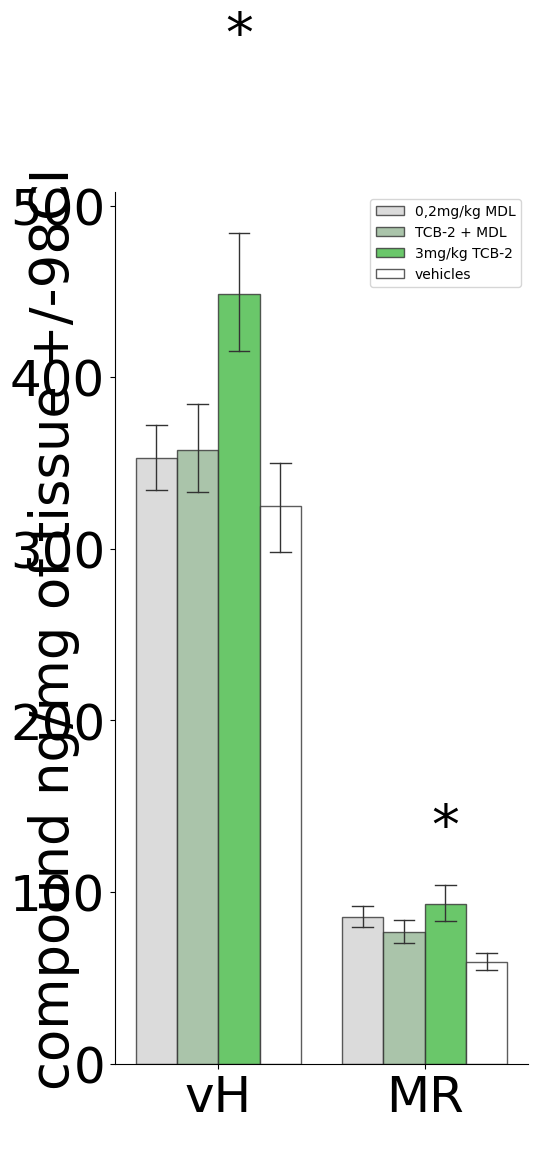

In [14]:
legit_regions = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]
high_DA = ['A','NAc', 'VM', 'DM', 'VL', 'DL', 'VTA']
low_DA = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","dH","vH","MD","VPL","VPR","DLG","HY","SC","SN","DR","MR","CB"]



DA_high_sig = ['A','NAc', 'MD', 'HY'] #CROP 4 FIG / agg_antag ["NAc", "VM", "DM", "VL", "DL"]
DA_low_sig = ["PL","aCC","S1L","S1R","DLG","HY","SC","DR"] #  /   agg_antag ["PL", "aCC", "S1L", "MR"]
DOPAC_DA_sig = ["PL","aCC", "S1R","DM","DLG","CB"]
toiMT_DA_sig = ["NAc","VM","DM","VL","DL"]
HVA_DA_sig = ["dH", "HY", "SC","CB", "VTA"] #VTA sig two way agg antag 

NA_sig= ['aCC','vH', 'NAc','VPR','HY', 'SC', 'SN','VTA'] #VMA/NA in DLG add vH too for summary style / agg_ant ["aCC", "vH"]
VMA_NA_sig = ['DLG']

# "aCC" # ['5HT', 'DA', "NA", 'HVA'] # ["5HIAA/5HT", "5HT/5HTP", "DOPAC/DA"]

from module.core.Figure import Histogram
hist = Histogram('TCB2', 
                experiment='agonist antagonist', 
                compound=['ASP'], 
                region= ['MR','vH'], 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                # custom_params={"fig_width": 20},  # fixed fig with bar width vaires 
                # custom_params={"ylabel_x": -0.02},
                )

# Histogram('TCB2', experiment="dose response", compound="5HIAA/5HT", region=None, from_scratch=True, remove_outliers=True)
# Histogram('TCB2', compound="5HIAA/5HT", region=['CE'], from_scratch=True, handle_outliers=False)
# Histogram('TCB2', compound="5HIAA/5HT", region=['CE'], from_scratch=True)
# Histogram('TCB2', compound="5HIAA/5HT", from_scratch=True)

# hist.statistics.select( test = 'tukey').result

Processing: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/dose response/DA in ['aCC', 'OF', 'PL', 'M1'].png
SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/dose response/DA in ['aCC', 'OF', 'PL', 'M1'].svg


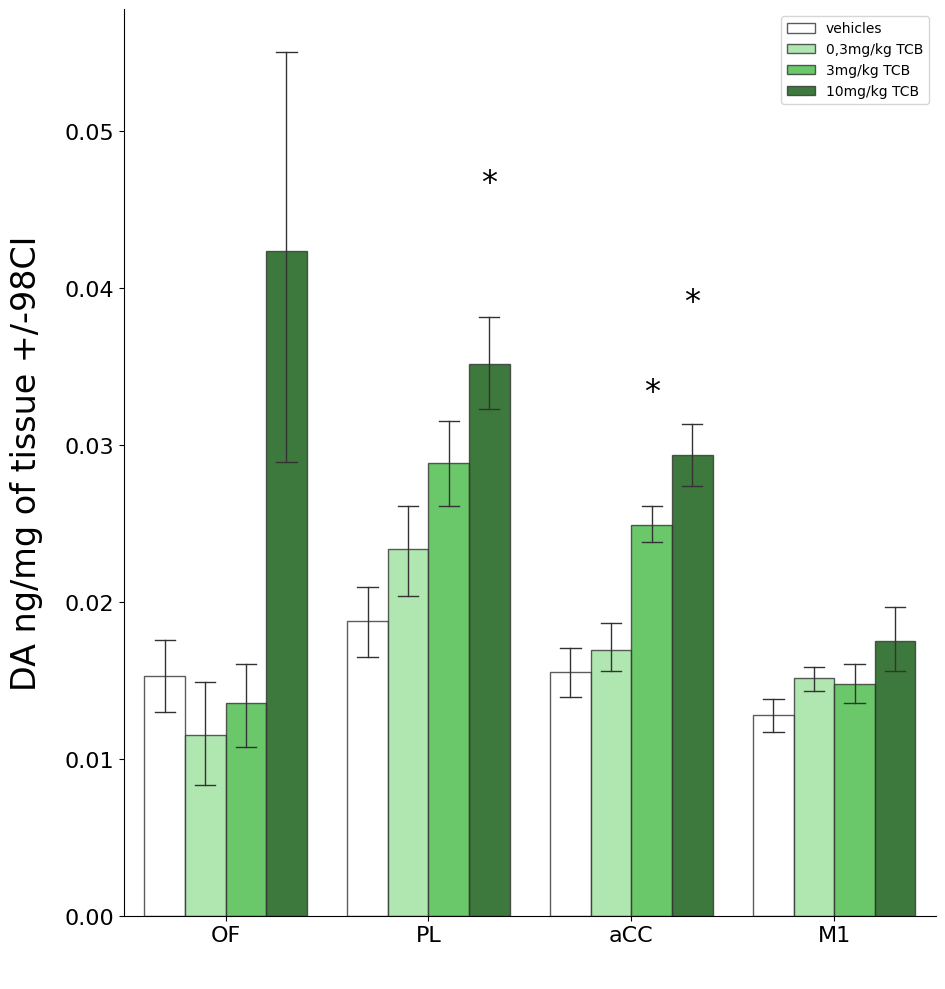

In [3]:
hist = Histogram('TCB2', 
                experiment='dose response', 
                compound="DA", 
                region= ["aCC", "OF", "PL", "M1"], 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                # custom_params={"ylabel_x": -0.1}
                )


In [13]:
hist.statistics.select(test='tukey').result



,group1,group2,meandiff,p-adj,lower,upper,reject
0,"0,3mg/kg TCB-2",10mg/kg TCB-2,43.7638,0.8115,-88.7730,176.3006,False
1,"0,3mg/kg TCB-2",3mg/kg TCB-2,96.2110,0.2249,-36.3258,228.7478,False
2,"0,3mg/kg TCB-2",vehicles,-50.3940,0.7514,-186.0498,85.2617,False
3,10mg/kg TCB-2,3mg/kg TCB-2,52.4472,0.6981,-76.8955,181.7899,False
4,10mg/kg TCB-2,vehicles,-94.1578,0.2416,-226.6947,38.3790,False
5,3mg/kg TCB-2,vehicles,-146.6050,0.0252,-279.1419,-14.0682,True


Creating matrices: 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]


SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/agonist antagonist/5HT in ['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'].png
SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/agonist antagonist/5HT in ['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'].svg


Correlogram(project='TCB2', experiment='agonist antagonist', compound='5HT', region=['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'], remove_outliers='False', p_value_threshold=0.05, filepath="/Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/agonist antagonist/5HT in ['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'].png", from_scratch=True, custom_params={}, columns=None, n_minimum=5, method='pearson')

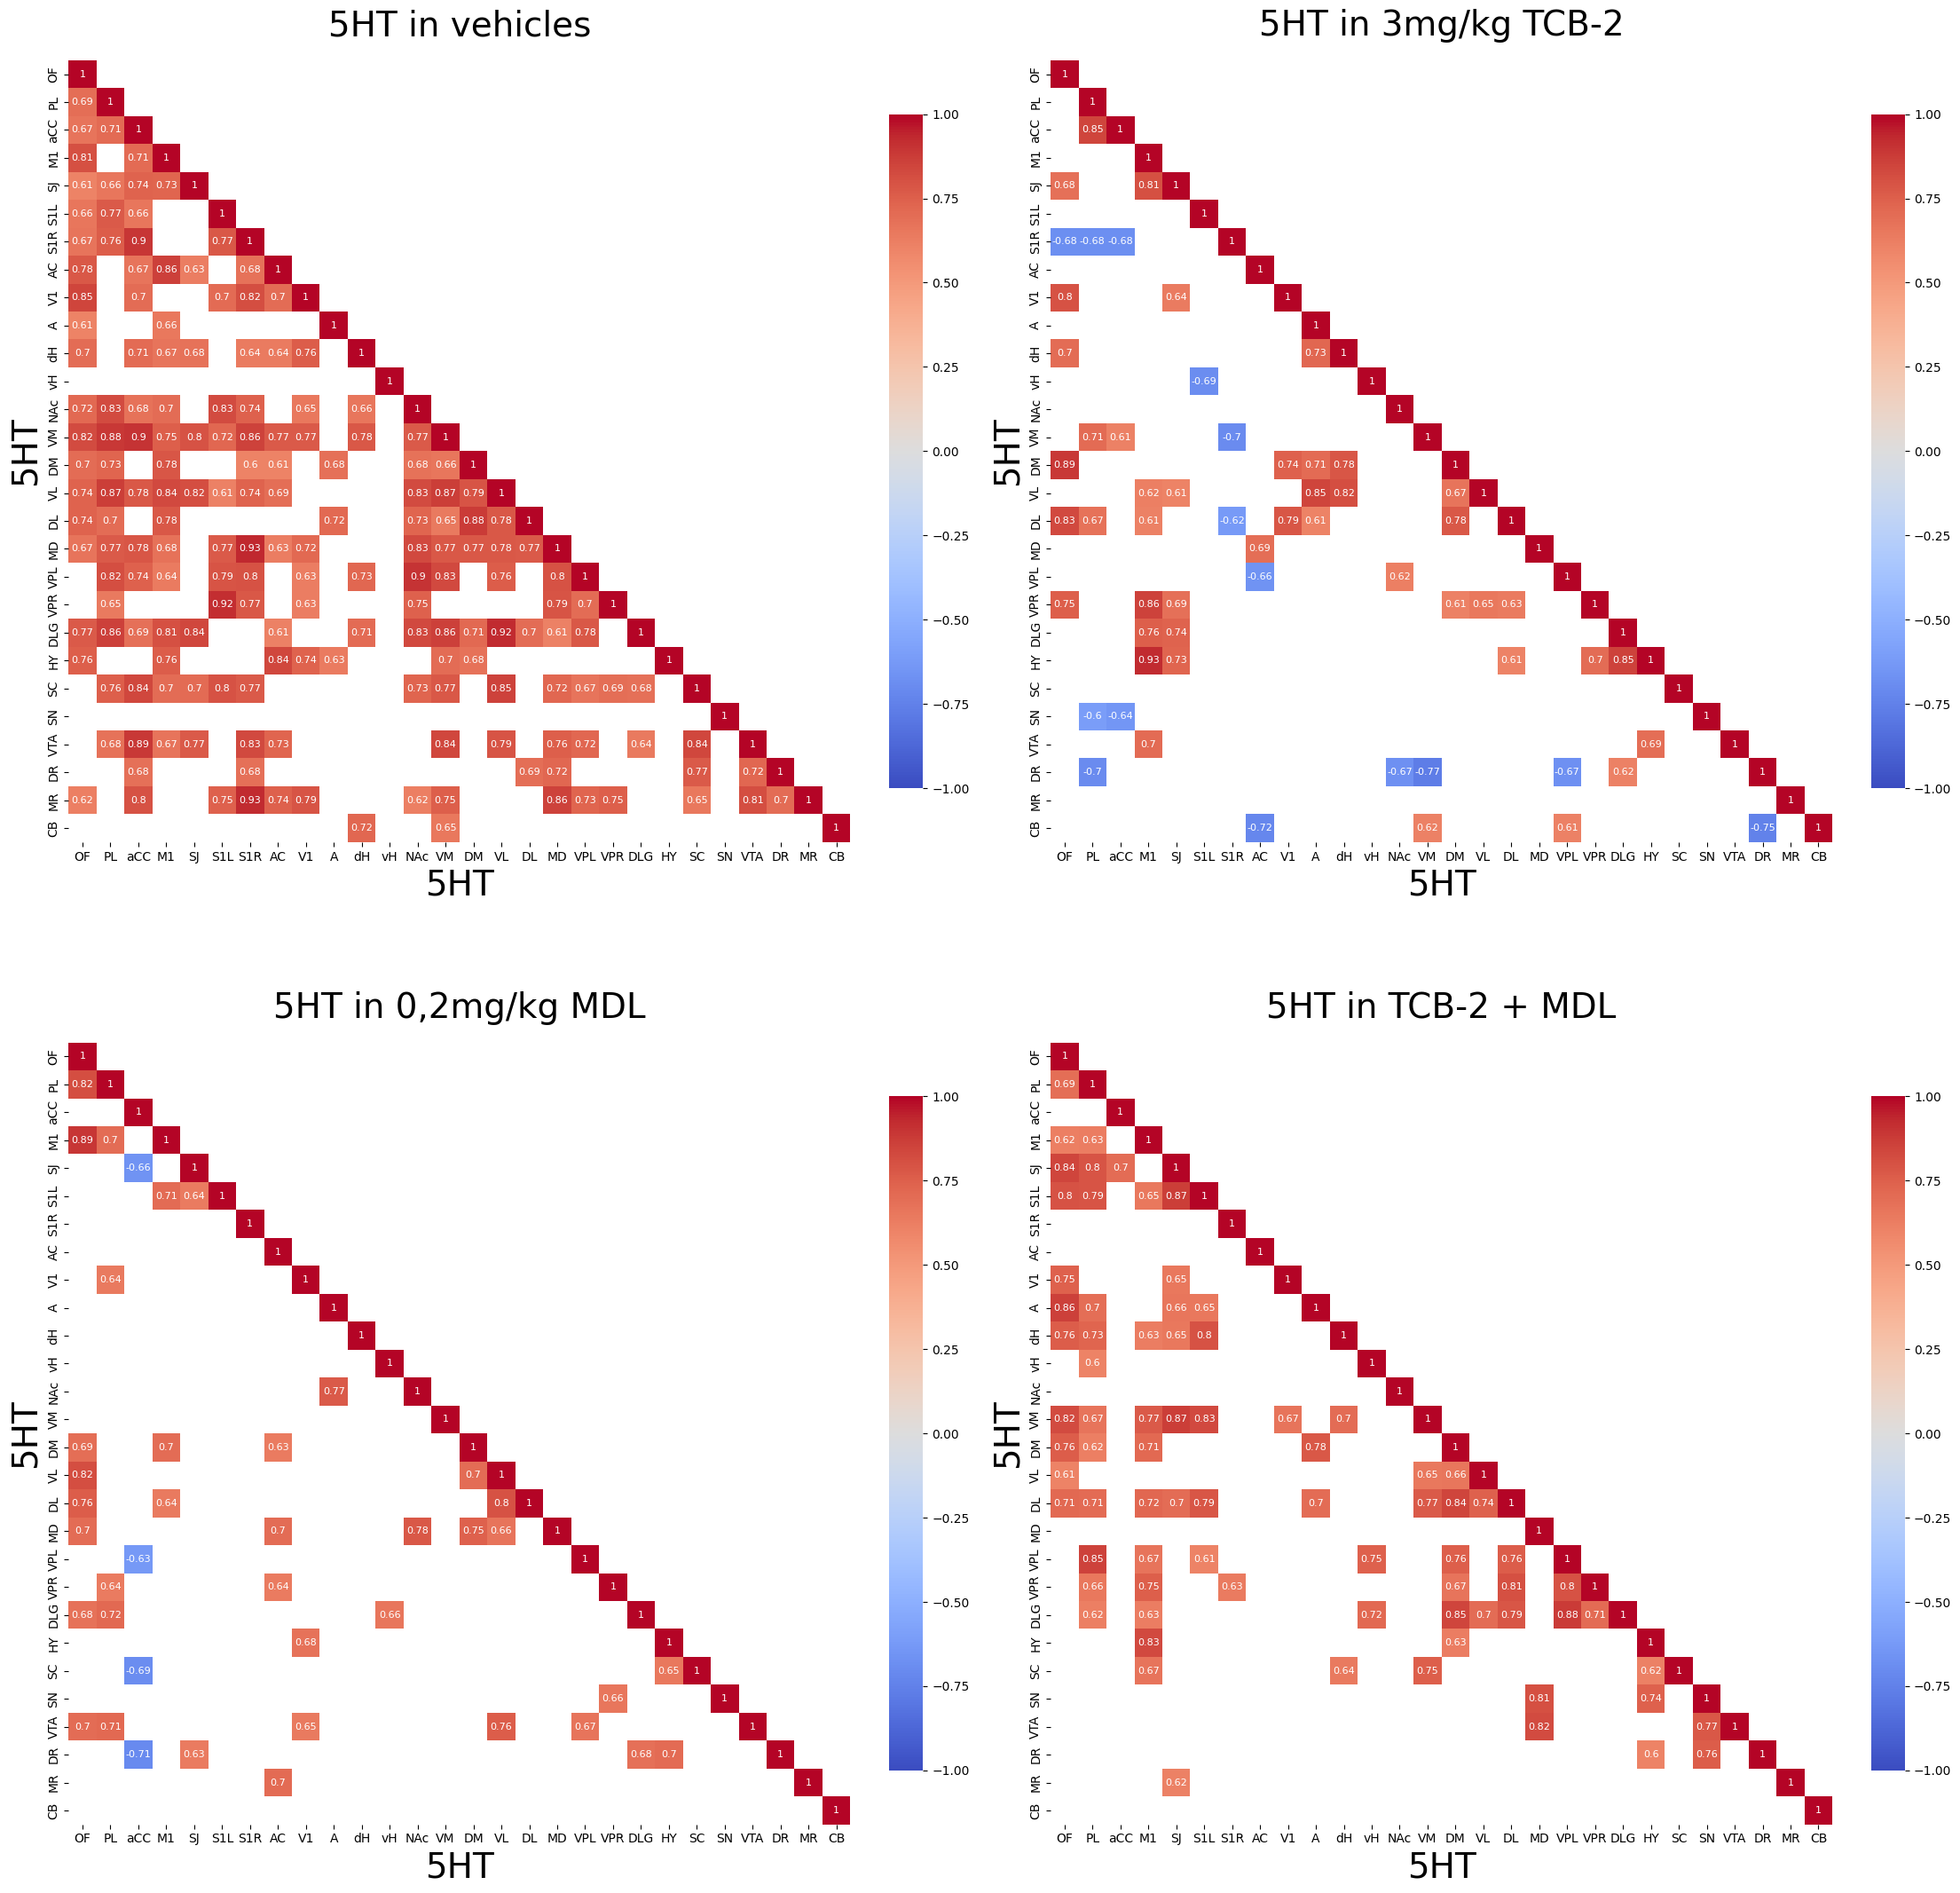

In [2]:
from module.core.Figure import Correlogram 

legit_regions = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]


Correlogram(project ='TCB2', 
                experiment='agonist antagonist', 
                compound=['5HT'], 
                region= legit_regions, 
                from_scratch=True, 
                remove_outliers='False', # calculated / eliminated / False
                )

/Users/jasminebutler/Desktop/phd/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Creating networks: 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]


SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/agonist antagonist/5HT in ['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'].png
SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/agonist antagonist/5HT in ['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'].svg


Network(project='TCB2', experiment='agonist antagonist', compound='5HT', region=['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'], remove_outliers='calculated', p_value_threshold=0.05, filepath="/Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/agonist antagonist/5HT in ['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'].png", from_scratch=True, custom_params={}, columns=None, n_minimum=5, method='pearson')

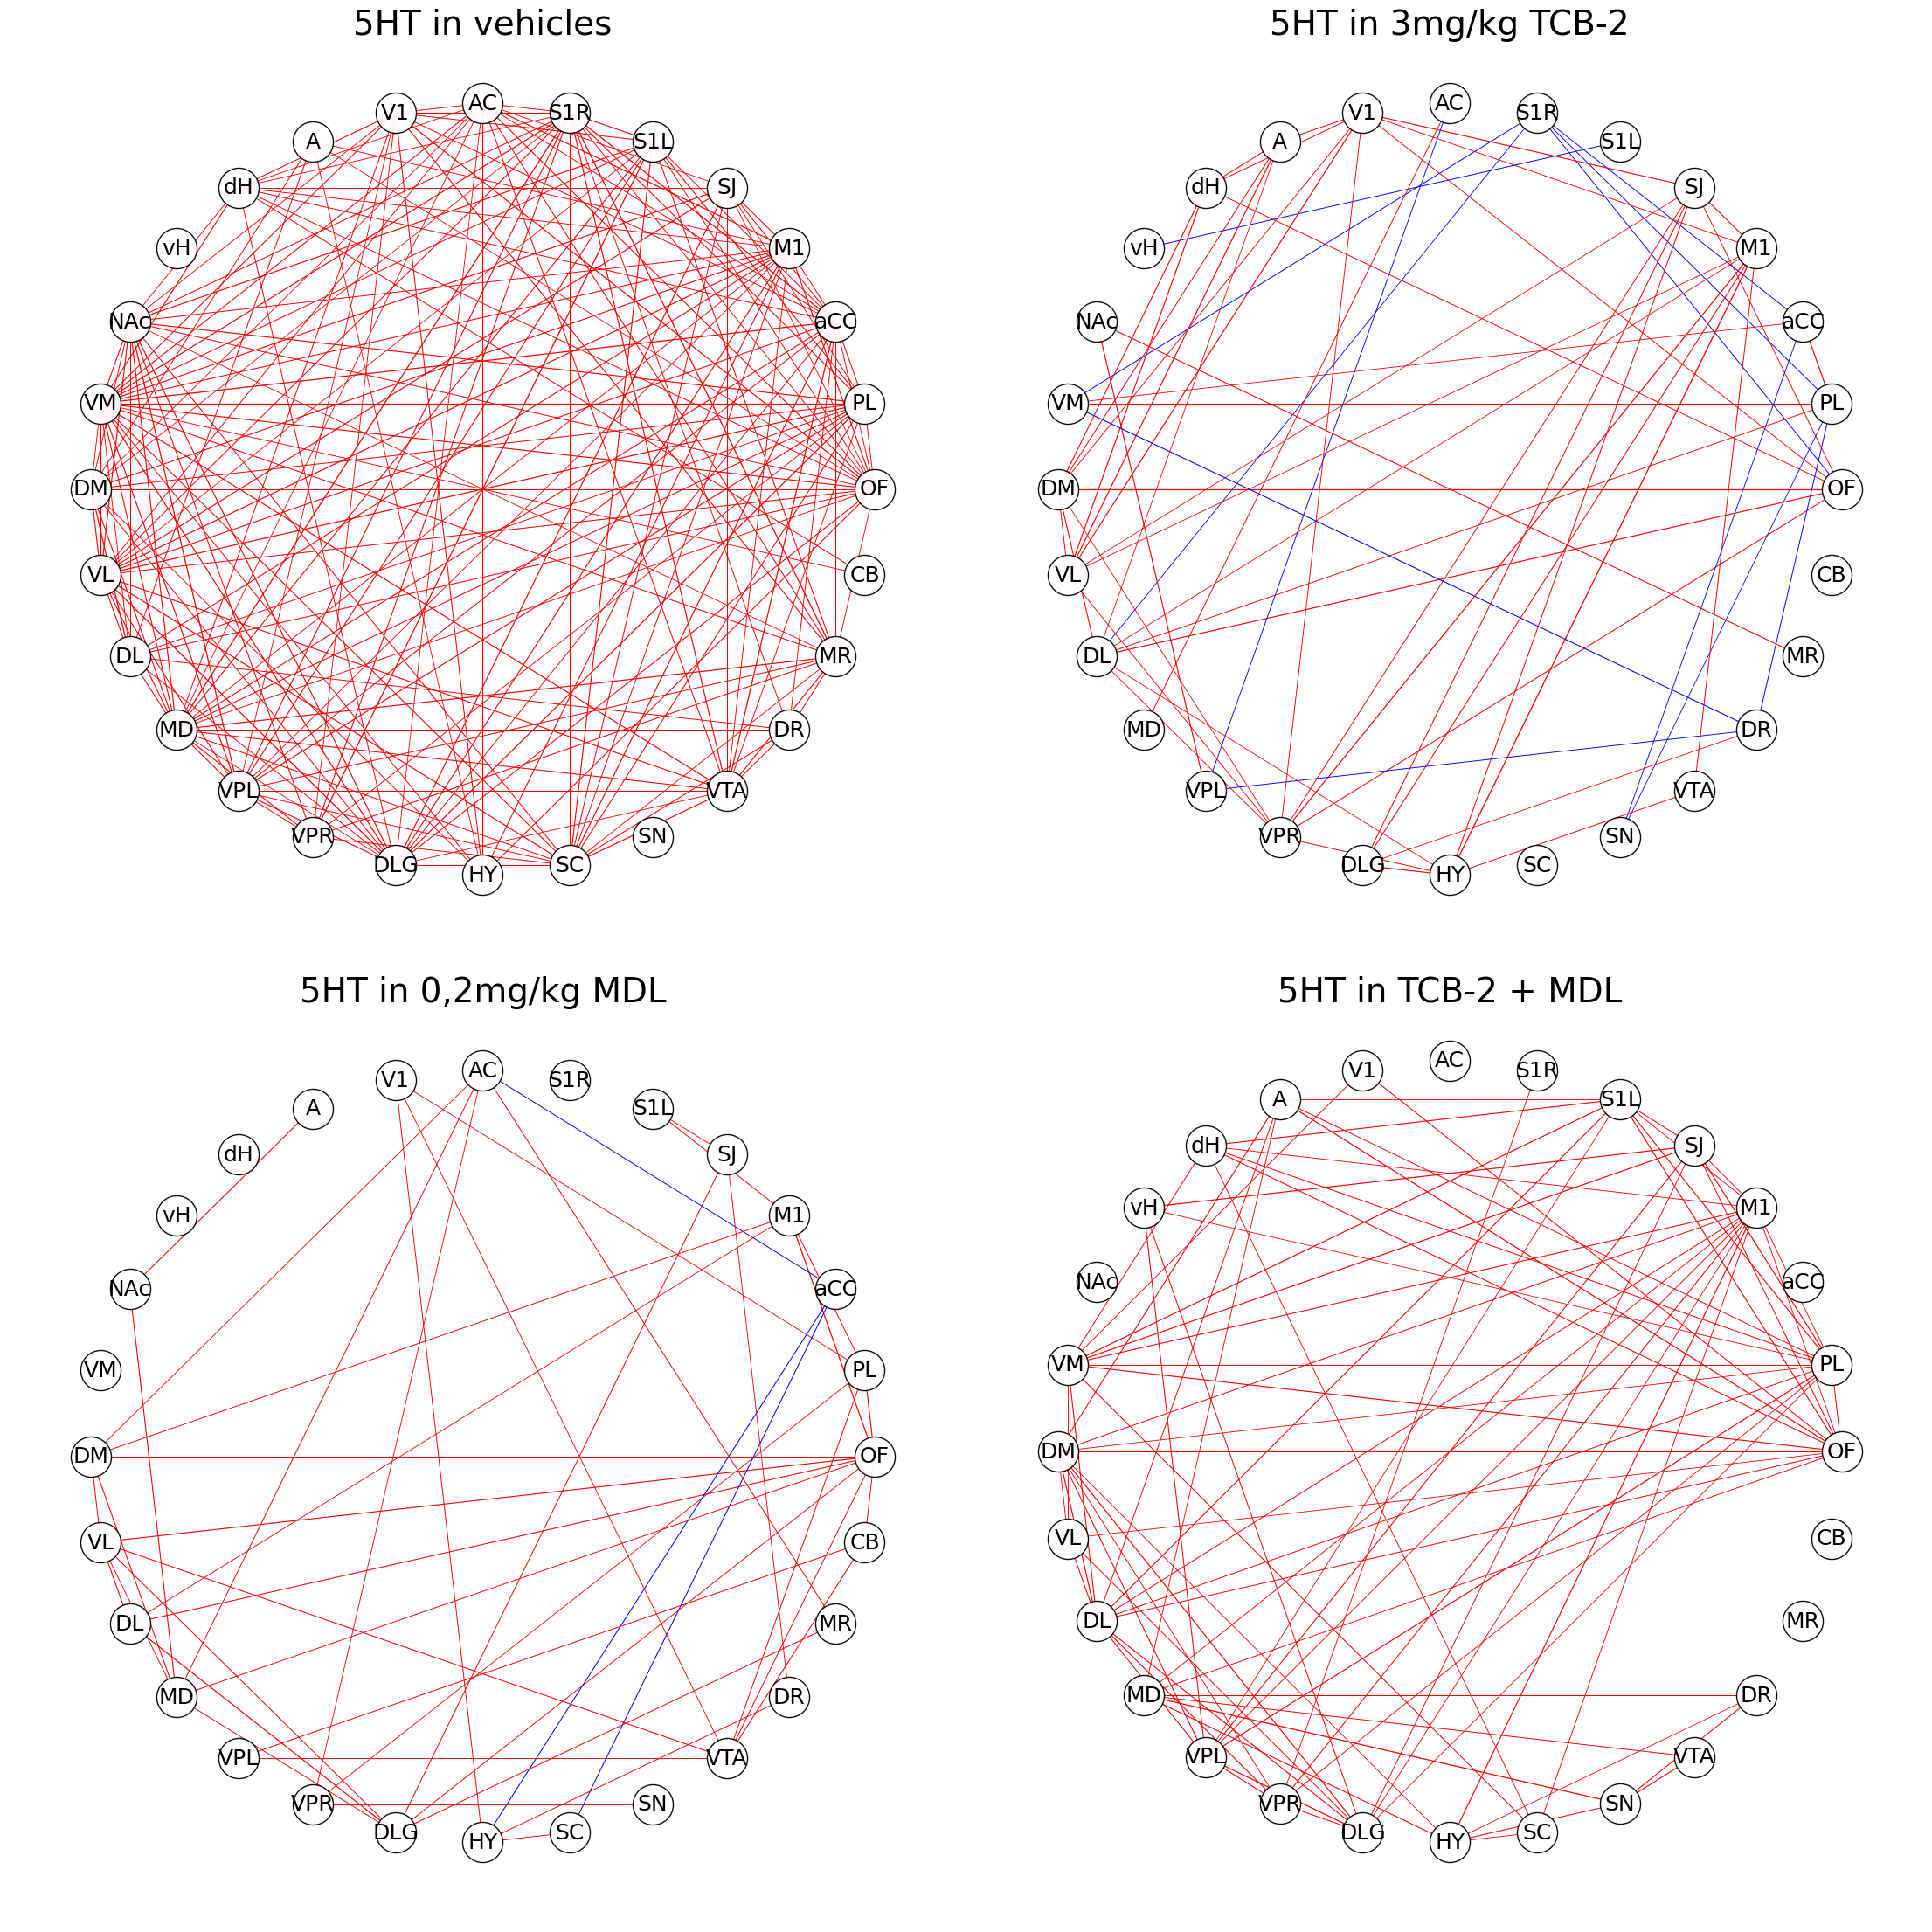

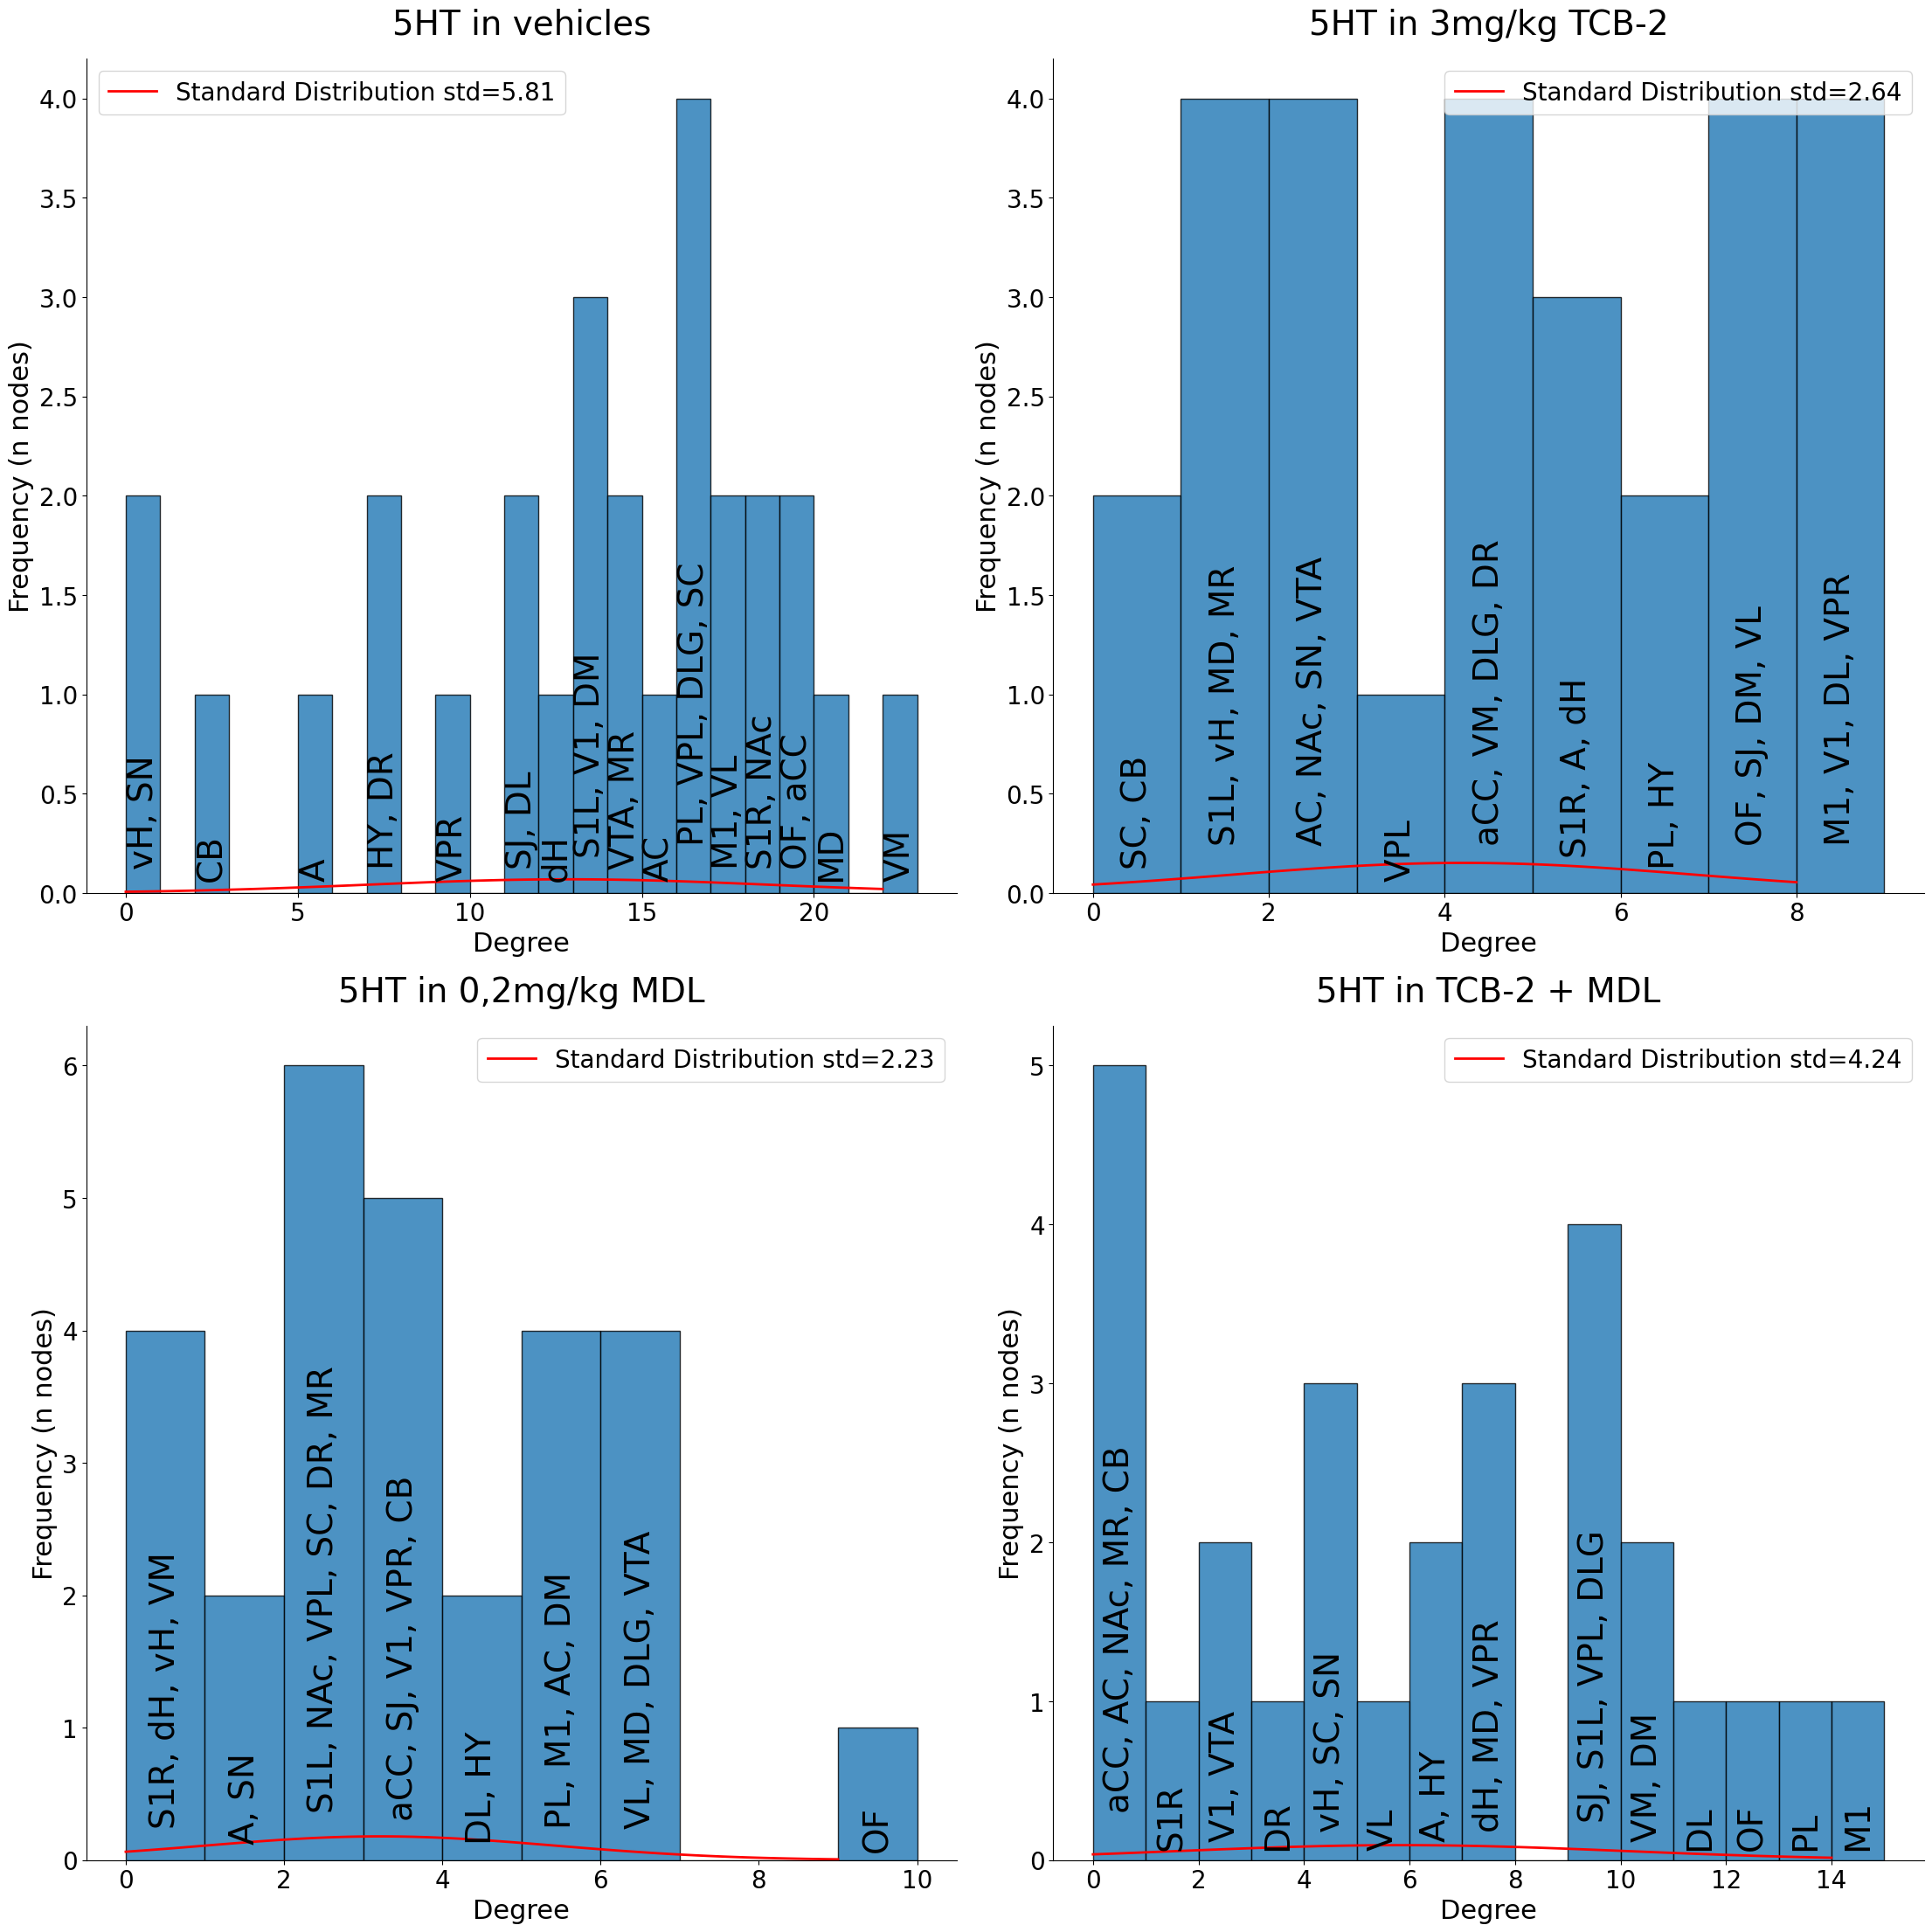

In [1]:
from module.core.Figure import Network 

legit_regions = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]


Network(project ='TCB2', 
                experiment='agonist antagonist', 
                compound=['5HT'], 
                region= legit_regions, 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                )

In [1]:
#TABLES 
# shapiro wilk and % of groups normal (+ non parametric versions of all)
# tissue weights
# publication table of quantatiatve data 

from module.core.Figure import Table

legit_regions = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]


Table(project ='TCB2', 
                # experiment='project', 
                compound=['5HT', '5HIAA/5HT', 'NA'], #SD
                treatment = 'vehicles',
                region= legit_regions, 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                )


/Users/jasminebutler/Desktop/phd/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CREATED AND CACHED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/['5HT', '5HIAA_5HT', 'NA'] in ['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'].xlsx


,compound,5HT,5HIAA/5HT,NA
0,treatment,vehicles,vehicles,vehicles
1,region,NaN,NaN,NaN
2,OF,0.14 ± 0.07,1.01 ± 0.21,0.24 ± 0.08
3,PL,0.10 ± 0.05,1.16 ± 0.28,0.11 ± 0.07
4,aCC,0.05 ± 0.02,2.72 ± 0.67,0.23 ± 0.06
5,M1,0.17 ± 0.08,0.22 ± 0.06,0.17 ± 0.05
6,SJ,0.12 ± 0.08,1.78 ± 1.58,0.08 ± 0.05
7,S1L,0.09 ± 0.05,1.40 ± 0.59,0.27 ± 0.08
8,S1R,0.07 ± 0.03,1.73 ± 0.58,0.21 ± 0.04
9,AC,0.07 ± 0.03,1.20 ± 0.22,0.15 ± 0.05
